# WTFC'23 Data Science and AI Track Group D Data Analysis project.
## Group Members
1. Sonia Anthony
2. Temitope Ayano

## Project Overview.
We worked on a datacamp competition called __Everyone Can Learn Python Scholarship.__ 

The competition consist of two parts. The first is a python/R C02 emission project while the second is an sql based project.

Here, we will be working with the python project.



# ⛽🚙 CO2 Emissions
## 📖 Introduction
Carbon dioxide (CO2) is the primary greenhouse gas emitted through human activities. A typical passenger vehicle emits about 4.6 metric tons of carbon dioxide per year. This number can vary based on a vehicle’s fuel, fuel economy,  number of miles driven per year and other features. 

The accumulation of greenhouse gases in the atmosphere is one of the main causes of global warming. It is therefore important to reduce the carbon footprint of vehicles by making regulations to minimize their impact on the environment.
## Aim
The aim of this study is to draft recommendations for guidelines on CO2 emissions rules and to determine the vehicles that produces lower emissions.

## 💾 Dataset
The dataset containing seven years of CO2 emissions details for Canadian vehicles gotten from the Government of Canada's open [data](https://open.canada.ca/data/en/dataset98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)
was provided.

The features in the dataset are:
- "Make" - The company that manufactures the vehicle.

- "Model" - The vehicle's model.

- "Vehicle Class" - Vehicle class by utility, capacity, and weight.

- "Engine Size(L)" - The engine's displacement in liters.

- "Cylinders" - The number of cylinders.

- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.

- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.

- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).

- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving.

## Research Questions

1. What is the median engine size in liters?
2. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?  
3. What is the correlation between fuel consumption and CO2 emissions?
4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'? 
5. What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?
6. What are vehicle Make, Model and Vehicle class with the highest and lowest CO2 emission.

In [ ]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Load the data
cars = pd.read_csv('/content/co2_emissions_canada.csv')

# create numpy arrays
cars_makes = cars['Make'].to_numpy()
cars_models = cars['Model'].to_numpy()
cars_classes = cars['Vehicle Class'].to_numpy()
cars_engine_sizes = cars['Engine Size(L)'].to_numpy()
cars_cylinders = cars['Cylinders'].to_numpy()
cars_transmissions = cars['Transmission'].to_numpy()
cars_fuel_types = cars['Fuel Type'].to_numpy()
cars_fuel_consumption = cars['Fuel Consumption Comb (L/100 km)'].to_numpy()
cars_co2_emissions = cars['CO2 Emissions(g/km)'].to_numpy()

# Preview the dataframe
cars

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


🔎 __Accessing the data__

In [ ]:
#Check for the number of rows and columns in the dataset
cars.shape

(7385, 9)

The data set has 9 features and 7385 observations

In [ ]:
#View summary informations about the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 8   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 519.4+ KB


All the features have the right data types.

In [ ]:
#Check for missing values
cars.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption Comb (L/100 km)    0
CO2 Emissions(g/km)                 0
dtype: int64

There are no missing values.

In [ ]:
#Check for duplicates
cars.duplicated().sum()

1314

There are 1314 duplicate values in the dataset.

In [ ]:
cars.describe()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,10.975071,250.584699
std,1.354170,1.828307,2.892506,58.512679
min,0.900000,3.000000,4.100000,96.000000
25%,2.000000,4.000000,8.900000,208.000000
50%,3.000000,6.000000,10.600000,246.000000
75%,3.700000,6.000000,12.600000,288.000000
max,8.400000,16.000000,26.100000,522.000000


## 📪🧹 DATA WRANGLING

The dataset is almost clean. 
- It does not contain any missing values.
- All the features have the right data type.
- It contains 1314 duplicated observations.

🧹 __Cleaning__
- The duplicated rows will be dropped

In [ ]:
cars.drop_duplicates(inplace=True)

#Check for the number of rows after dropping duplicates
cars.shape

(6071, 9)

The dataset now contains 6071 rows and 9 columns after removing the duplicates.

## 🔎📈 EXPLORATORY DATA ANALYSIS 

> What is the main feature of interest in the dataset? 
- The feature of interest is CO2 Emissions.

> What features will help support our investigation into the feature(s) of interest? 
- All the 7 features aside CO2 Emissions will help to provide necessary insights.





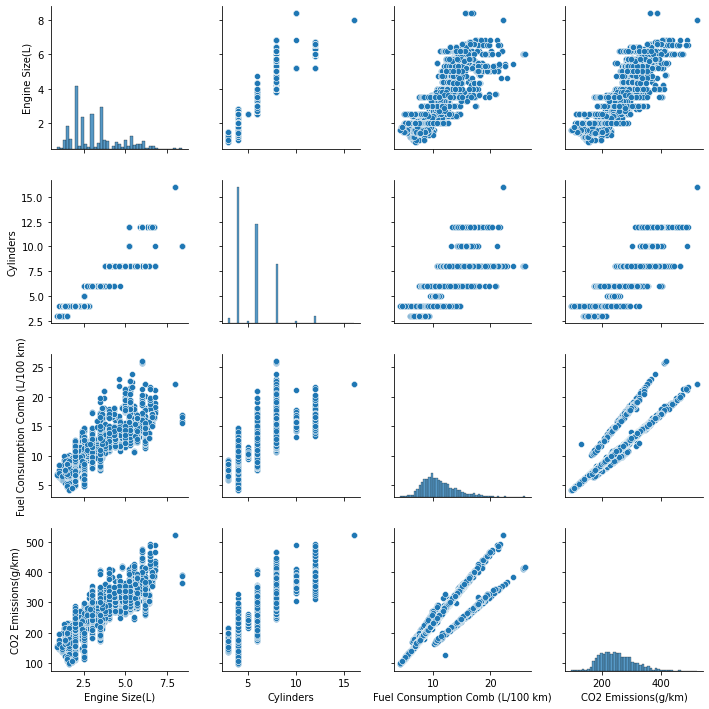

In [ ]:
# Quick Visualization of the dataset using the seaborn pairsplot
sns.pairplot(cars);

### 🥇 UNIVARIATE EXPLORATION


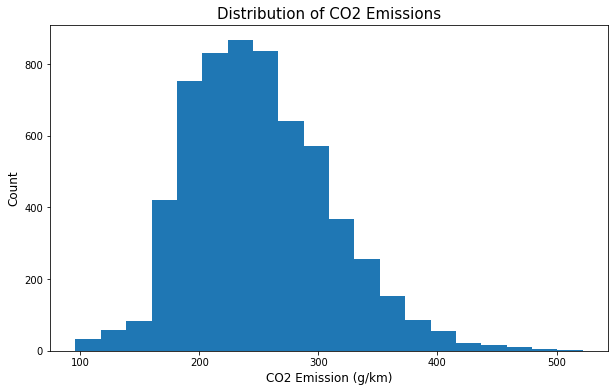

In [ ]:
#Distribution of CO2 Emissions

#define function to set figure size
def figsize(width, height):
  plt.figure(figsize=[width, height])


#define function to plot histograms
def plot_hist(df, x, bins, title, xlabel, ylabel):
  plt.hist(data = df, x = x, bins=bins)
  plt.xlabel(xlabel, fontsize = 12)
  plt.ylabel(ylabel, fontsize = 12)
  plt.title(title, fontsize = 15)

#CO2 emissions
figsize(10,6)
plot_hist(cars, "CO2 Emissions(g/km)", 20, "Distribution of CO2 Emissions", "CO2 Emission (g/km)", "Count")

__Observation__:

- The distribution of CO2 Emissions is almost normal
- The amount of CO2 emitted is concentrated between 200 - 300 gram per kilometer.

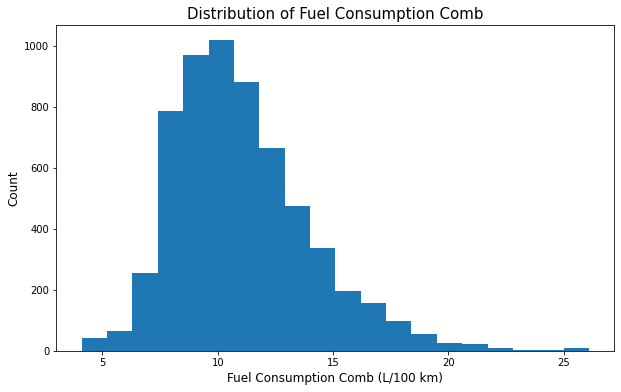

In [ ]:
#Distribution of Fuel consumption
figsize(10,6)
plot_hist(cars, "Fuel Consumption Comb (L/100 km)", 20, "Distribution of Fuel Consumption Comb", "Fuel Consumption Comb (L/100 km)", "Count")


__Observation__:
- Most of the cars have a fuel consumption rate around 7 and 15 Litres per 100 km.

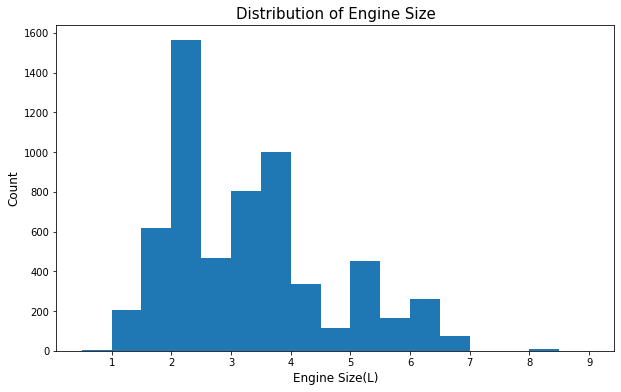

In [ ]:
figsize(10,6)
bins = np.arange(0.5, 9+0.5, 0.5)
plot_hist(cars, "Engine Size(L)", bins, "Distribution of Engine Size", "Engine Size(L)", "Count")
plt.xticks(np.arange(1, 8.5+1, 1));


__Observation__: 
- The distribution of engine size is right skewed.

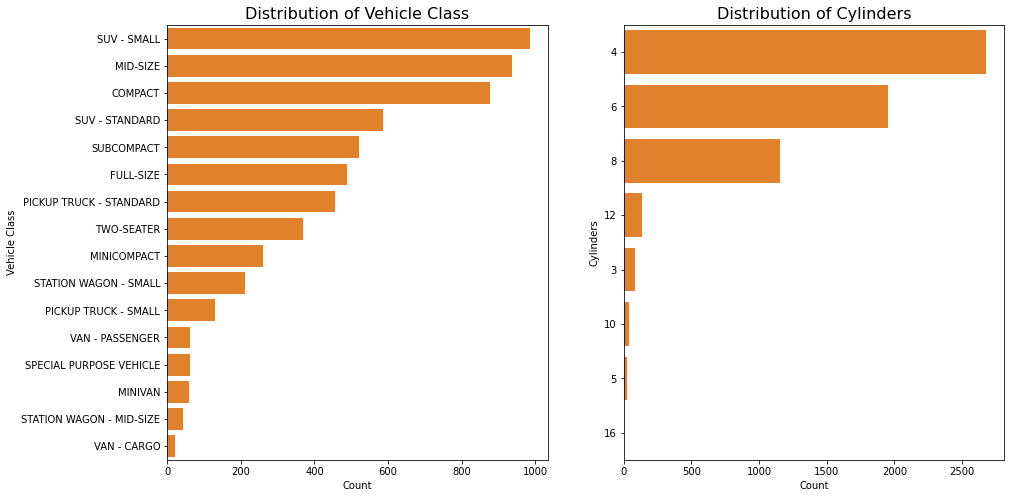

In [ ]:
# Distribution of Make, Model, and Vehicle Class

def barplot(df, col, color, x_label, y_label, title):
    order= df[col].value_counts().index
    sns.countplot(data=df, y=col, color=color, order=order);
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, fontsize=16)

#set figure size
figsize(15, 8)

#set plot color
color = sns.color_palette()[1]

# Distribution of Vehicle Class
plt.subplot(1,2,1)
barplot(cars, "Vehicle Class", color, "Count", "Vehicle Class", "Distribution of Vehicle Class")

# Distribution of Cylinders
plt.subplot(1,2,2)
barplot(cars, "Cylinders", color, "Count", "Cylinders", "Distribution of Cylinders")


__Observation__: 
- Most of the cars have 4 cylinders. 
- The SUV-Small veicle has the highest count

Text(0.5, 1.0, 'Fuel Type')

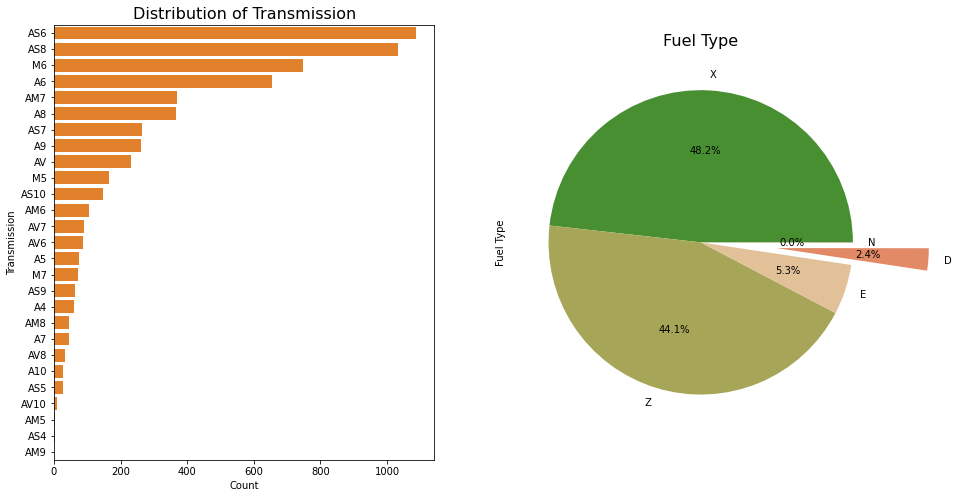

In [ ]:
#set figure size
figsize(15, 8)

#Ditribution of Vehicle transmission type
plt.subplot(1,2,1)
barplot(cars, "Transmission", color, "Count", "Transmission", "Distribution of Transmission")

#Ditribution of Fuel type
plt.subplot(1,2,2)
mycolors = ["#488f31", "#a7a658", "#e2c199", "#e28a66", "#de425b"]
cars["Fuel Type"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', explode = [0, 0,  0, 0.5, 0], colors = mycolors);
plt.title("Fuel Type", fontsize = 16)

__Observation__:
- AS6 transmission has the highest count, and the cars that uses X Fuel have the highest percentage.

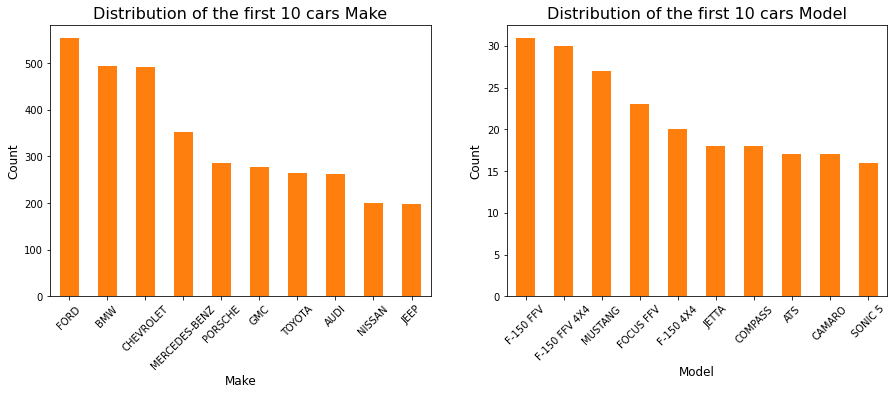

In [ ]:
# Set figure size for subplots
figsize(15,5)

# Distribution of the first 10 cars Make
plt.subplot(1,2,1)
cars["Make"].value_counts()[:10].plot(kind = 'bar', color = color)
plt.xticks(rotation = 45)
plt.xlabel("Make", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of the first 10 cars Make", fontsize=16)


# Distribution of the first 10 cars Model
plt.subplot(1,2,2)
cars["Model"].value_counts()[:10].plot(kind = 'bar', color = color)
plt.xticks(rotation = 45);
plt.xlabel("Model", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of the first 10 cars Model", fontsize=16);


__Observation__
- The Ford and F-150 model has the highest count. 

### 🥈 BIVARIATE EXPLORATION

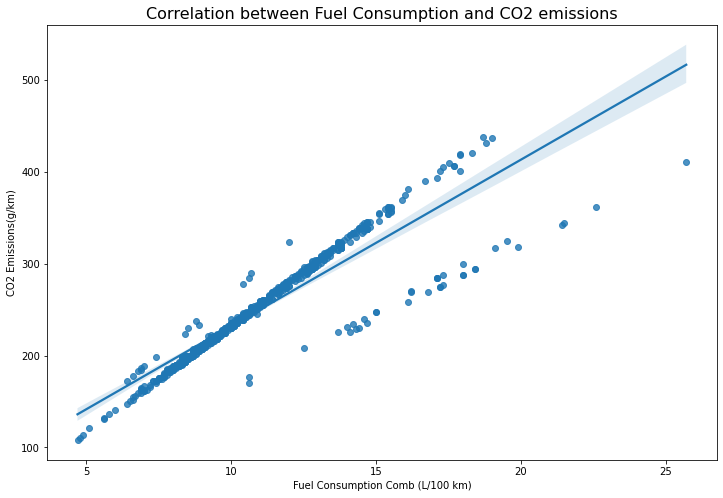

In [ ]:
# Correlation between Fuel Consumption Comb (L/100 km) and CO2 emissions
figsize(12,8)

#Taking a random sample of the population(>10%)
cars_Sample = cars.sample(650) 

Fuel_Consumption_Sample, CO2_Sample = cars_Sample["Fuel Consumption Comb (L/100 km)"], cars_Sample["CO2 Emissions(g/km)"]

sns.regplot(x=Fuel_Consumption_Sample, y =CO2_Sample);
plt.title('Correlation between Fuel Consumption and CO2 emissions', fontsize=16);

__Observation__: 
- The more a vehicle consumes fuel, the higher the CO2 it emits.

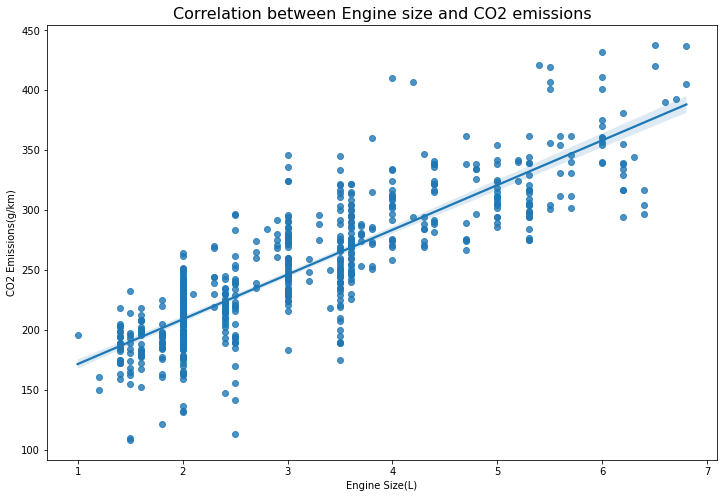

In [ ]:
# Correlation between Engine size and CO2 emissions
figsize(12,8)

Engine_Size_sample, CO2_Sample = cars_Sample["Engine Size(L)"], cars_Sample["CO2 Emissions(g/km)"]

sns.regplot(x=Engine_Size_sample, y=CO2_Sample);
plt.title('Correlation between Engine size and CO2 emissions', fontsize=16);

__Observation__: 
- Cars with high engine size tends to emit more CO2 compared to those with low engine size.

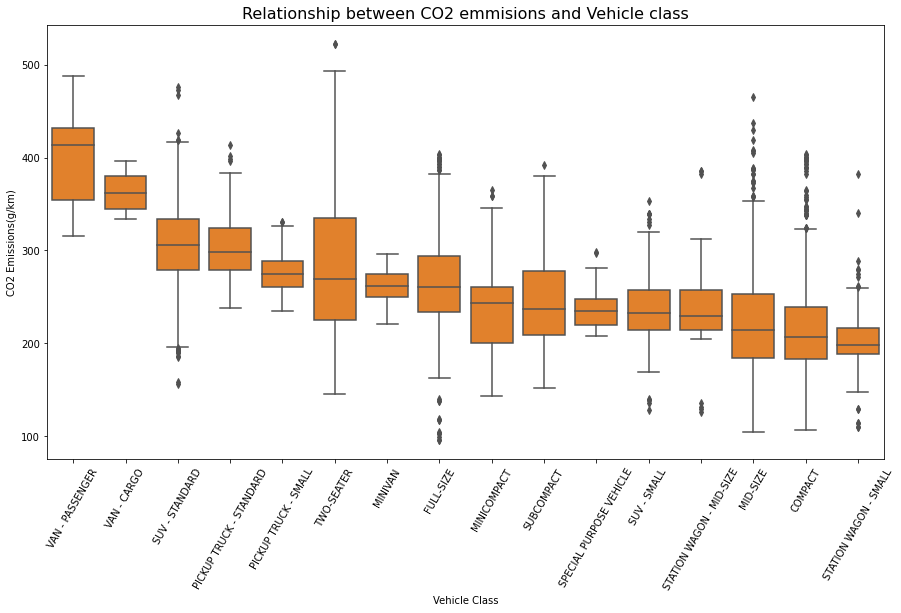

In [ ]:
# Relationship between vehicle class and CO2 emmision
figsize(15,8)

# Order the Vehicle class by the median
order = cars.groupby("Vehicle Class")["CO2 Emissions(g/km)"].median().sort_values(ascending = False).index.to_list()

sns.boxplot(x = "Vehicle Class", y= "CO2 Emissions(g/km)", data = cars, order = order, color = color);
plt.xticks(rotation=60);
plt.title("Relationship between CO2 emmisions and Vehicle class", fontsize=16);

__Observation__: 
- The Van- Passenger Vehicle has the highest median CO2 emission rate and the small station wagon has the least CO2 emission.

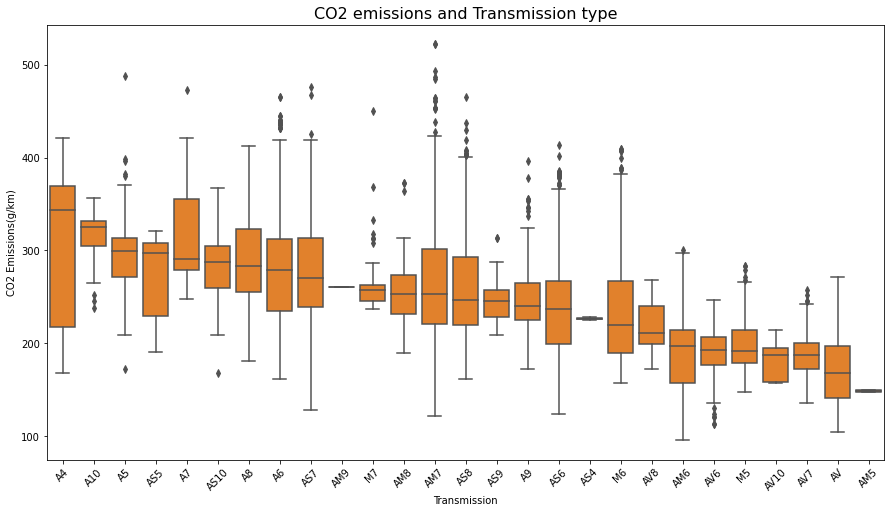

In [ ]:
# Relationship between Transmission and CO2 emmision
figsize(15,8)

#Order the Transmission by the median
order = cars.groupby("Transmission")["CO2 Emissions(g/km)"].median().sort_values(ascending = False).index.to_list()

sns.boxplot(x = "Transmission", y= "CO2 Emissions(g/km)", data = cars, order = order, color = color);
plt.xticks(rotation=45)
plt.title("CO2 emissions and Transmission type", fontsize=16);

__Observation__: 
- Automatic vehicles with 4 gears (A4) have the  maximum and highest median CO2 emission 
- The Continously variable (AV) vehicles have the lowest median CO2 emission. 
- The Automatic Manual with 6 gears (AM6) transmission type has the lowest CO2 emission.



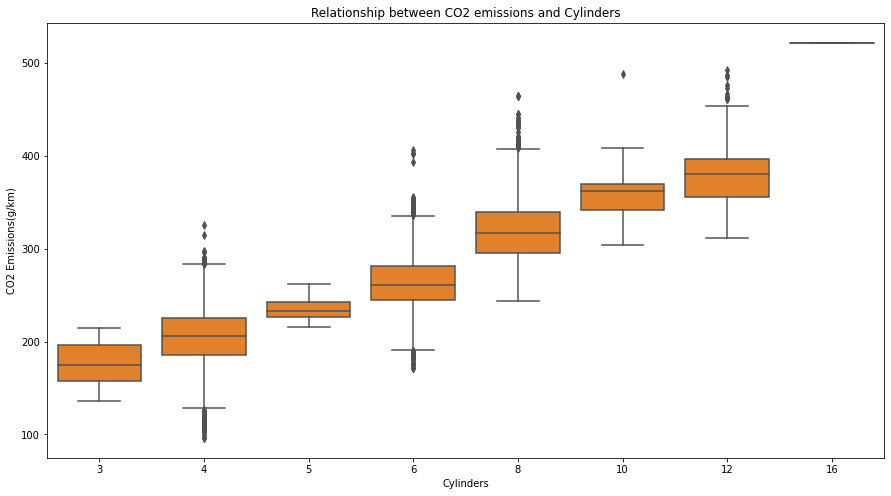

In [ ]:
#Relationship between CO2 emissions and Cylinders
figsize(15,8)

sns.boxplot(x = "Cylinders", y="CO2 Emissions(g/km)", data = cars, color=color)
plt.title("Relationship between CO2 emissions and Cylinders");

__Observations__:
-  Cars with small number of cylinders have the low CO2 emission rate.

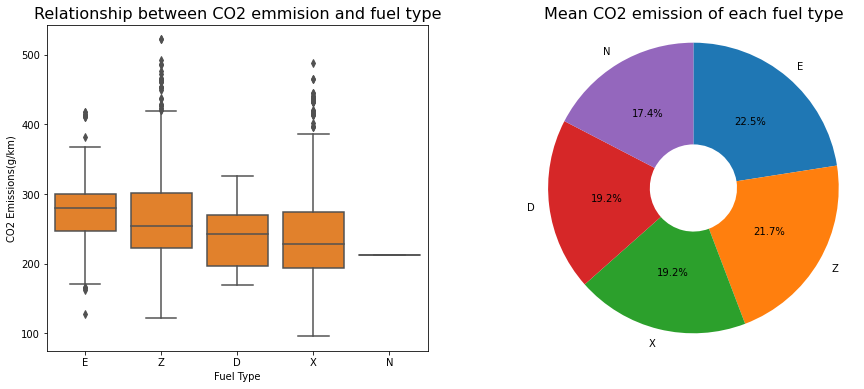

In [ ]:
#fuel type and CO2 emmision
figsize(15,6)

#Relationship between CO2 emmision and fuel type
plt.subplot(1,2,1)
order = cars.groupby("Fuel Type")["CO2 Emissions(g/km)"].median().sort_values(ascending = False).index.to_list()

sns.boxplot(x = "Fuel Type", y= "CO2 Emissions(g/km)", data = cars, order=order, color = color)
plt.title("Relationship between CO2 emmision and fuel type", fontsize=16 );



#Which fuel type produces the highest and lowest mean CO2 emission.
plt.subplot(1,2,2)
avg_fuel_CO2 = cars.groupby("Fuel Type")["CO2 Emissions(g/km)"].mean().sort_values(ascending = False)

plt.pie(avg_fuel_CO2, labels=avg_fuel_CO2.index, autopct='%1.1f%%', startangle=90, 
        counterclock=False, wedgeprops={'width': 0.7})
plt.axis('square')
plt.title('Mean CO2 emission of each fuel type', fontsize = 16);

__Observation__: 
- The Z(premium gasoline) fuel type has the highest CO2 emission rate, while Ethanol(E) has the highest median/mean CO2 emission. 
- There is only one car with the Natural gas fuel type, and the X(regular gasoline) fuel type has the lowest emission rate.

### 🥉 MULTIVARIATE EXPLORATION

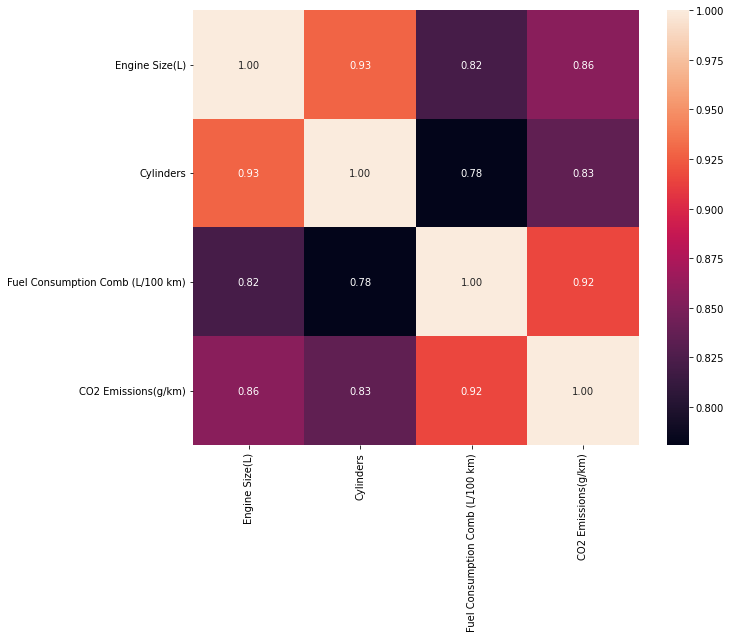

In [ ]:
#Correlation between the numerical variables.
figsize(10,8)
corr = cars.corr()
sns.heatmap(corr, annot = True, fmt = '.2f');

__Observations__
- All the numerical variables are positively correlated to one amother. 
- With respect to our variable of interest (CO2 Emissions), Fuel consumption has a strong positive correlation of 0.92, number of Cylinders has 0.83 and the engine size has a correlation of 0.86.

## 📉 EXPLANATORY DATA ANALYSIS

## ⁉ Questions

1. What is the median engine size in liters?

> __The median engine size is 3.0__

In [ ]:
cars["Engine Size(L)"].median()


3.0

2. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?


Fuel Type
E    16.931269
N    12.700000
Z    11.403438
X    10.111339
D     8.730070
Name: Fuel Consumption Comb (L/100 km), dtype: float64


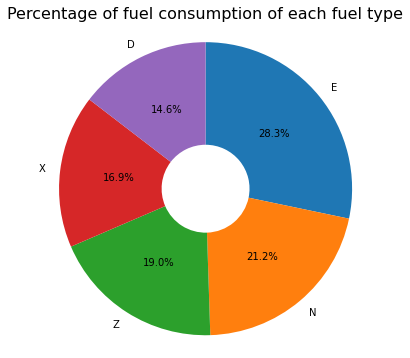

In [ ]:
#Average fuel consumption of each fuel type
average_fuel_consum = cars.groupby("Fuel Type")["Fuel Consumption Comb (L/100 km)"].mean()
average_fuel_consum.sort_values(ascending = False, inplace = True)
print(average_fuel_consum)


#Percentage of fuel consumption of each fuel type
figsize(8,6)
plt.pie(average_fuel_consum, labels=average_fuel_consum.index, autopct='%1.1f%%', startangle=90, 
        counterclock=False, wedgeprops={'width': 0.7})
plt.axis('square')
plt.title('Percentage of fuel consumption of each fuel type', fontsize = 16);

> __The average fuel consumption for__
1. regular gasoline(X) = 10.1
2. premium gasoline(Z) = 11.4
3. ethanol(E) = 16.9
4. Diesel(D) = 8.73 (lowest)

> natural gas(N) car(1) has a fuel consumption of 12.7 L/100 km.

3. What is the correlation between fuel consumption and CO2 emissions?

> __As shown in the scatterplot and correlation heatmap above, there is a strong positive correlation (0.92 between fuel consumption and CO2 emissions.__ <br/>
__This means that as the fuel consumption increases, CO2 emission also increases.__

4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?

> __From the boxplot of vehicle class and CO2 emission and using the groupby method, it can be deduced that the Mid-size vehicles have lower average CO2 emission (222.44) compared to suv-small vehicles (236.08)__

In [ ]:
round(cars.groupby("Vehicle Class")["CO2 Emissions(g/km)"].mean(), 2)

Vehicle Class
COMPACT                     217.70
FULL-SIZE                   263.64
MID-SIZE                    222.44
MINICOMPACT                 236.66
MINIVAN                     260.53
PICKUP TRUCK - SMALL        276.64
PICKUP TRUCK - STANDARD     302.12
SPECIAL PURPOSE VEHICLE     237.69
STATION WAGON - MID-SIZE    241.74
STATION WAGON - SMALL       202.39
SUBCOMPACT                  244.73
SUV - SMALL                 236.08
SUV - STANDARD              306.37
TWO-SEATER                  281.82
VAN - CARGO                 361.50
VAN - PASSENGER             395.55
Name: CO2 Emissions(g/km), dtype: float64

5a. What are the average CO2 emissions for all vehicles? 
> __The average CO2 emissions for all vehicle is 250.95__ 


In [ ]:
#average CO2 emissions for all vehicles
round(cars['CO2 Emissions(g/km)'].mean(),2)

250.95

5b. For vehicles with an engine size of 2.0 liters or smaller?
> __The average CO2 emissions for vehicle with an engine size of 2.0 liters or smaller is 198.58__

In [ ]:
# average CO2 emissions for vehicles with an engine size of 2.0 liters or smaller?
Eng_size_sub = cars[cars['Engine Size(L)'] <= 2.0]
round(Eng_size_sub['CO2 Emissions(g/km)'].mean(), 2)

198.58

6. What are vehicle Make, Model and Vehicle class with the highest  and lowest CO2 emission.

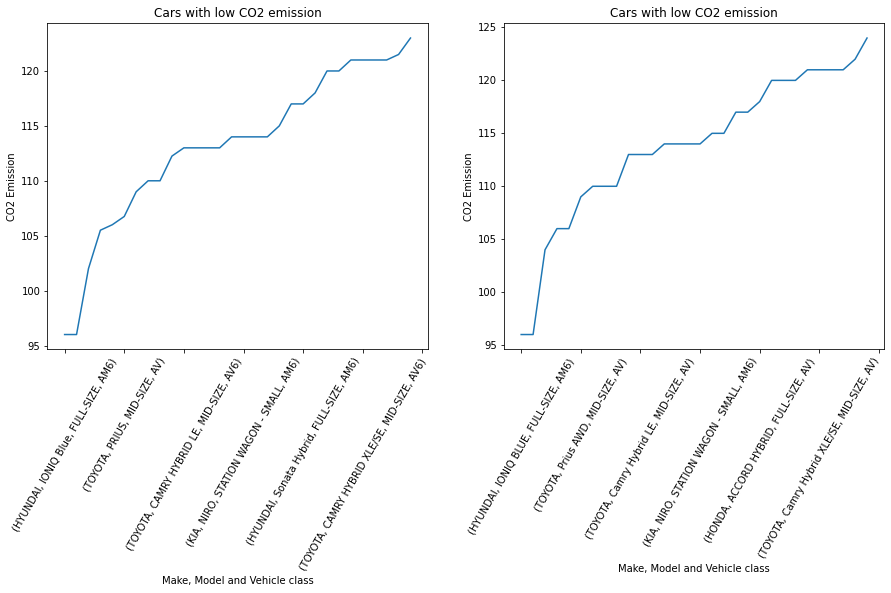

In [ ]:
#Vehicle with low mean CO2 emmision

figsize(15,6)
plt.subplot(1,2,1)
cars.groupby(['Make', 'Model', 'Vehicle Class', 'Transmission'])['CO2 Emissions(g/km)'].mean().sort_values()[:30].plot()
plt.ylabel('CO2 Emission')
plt.xlabel('Make, Model and Vehicle class')
plt.title('Cars with low CO2 emission')
plt.xticks(rotation = 60)


#top Vehicle Make, Model and class with low CO2 emission
plt.subplot(1,2,2)
cars.groupby(['Make', 'Model', 'Vehicle Class', 'Transmission'])['CO2 Emissions(g/km)'].max().sort_values()[:30].plot()
plt.ylabel('CO2 Emission')
plt.xlabel('Make, Model and Vehicle class')
plt.title('Cars with low CO2 emission')
plt.xticks(rotation = 60);

__Observation:__
The Hyundai, Ioniq model that are full size have the lowest CO2 emission, and are therefore environmental friendly.

Vehicles with the AV, AM6 and AV6 transmission class also tend to have low CO2 emission.

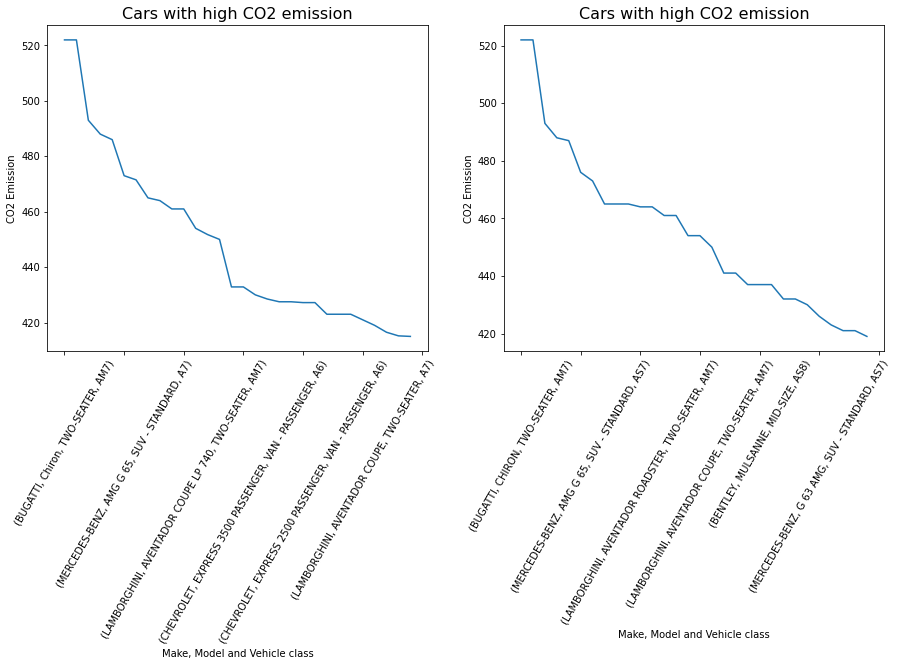

In [ ]:
#Vehicle with high mean CO2 emmision

figsize(15,6)
plt.subplot(1,2,1)
cars.groupby(['Make', 'Model', 'Vehicle Class', 'Transmission'])['CO2 Emissions(g/km)'].mean().sort_values(ascending = False)[:30].plot()
plt.xticks(rotation = 60)
plt.ylabel('CO2 Emission')
plt.xlabel('Make, Model and Vehicle class')
plt.title('Cars with high CO2 emission', fontsize=16)
plt.xticks(rotation = 60)


# Vehicles Make, Model and class with high CO2 emission
plt.subplot(1,2,2)
cars.groupby(['Make', 'Model', 'Vehicle Class', 'Transmission'])['CO2 Emissions(g/km)'].max().sort_values(ascending = False)[:30].plot()
plt.xticks(rotation = 60)
plt.ylabel('CO2 Emission')
plt.xlabel('Make, Model and Vehicle class')
plt.title('Cars with high CO2 emission', fontsize=16)
plt.xticks(rotation = 60);

__Observation__:
The bugatti, chiron vehicle that are two seaters have the highest CO2 emission rate.
The AM7, A6 and A7 vehicles have the highest CO2 emmision.

## 👀💹 INSIGHTS

- Most vehicles consume about 7 - 15 L/100Km
- The more fuel a vehicle consumes, the more CO² it emits.

- Distribution of engine size is right skewed and the smaller an engine size, the less CO² it emits.

- Most vehicles use X fuel (Regular gasoline) and it has the lowest CO² emission rate.

- Z fuel (Premium gasoline) has the highest CO² emission rate.

- Vehicles with smaller cylinders have low CO² emission rates.

- Based on transmission, Automatic vehicles with 4 gears emit more CO² than Automatic Manual with 6 gears.

- AM6 and AV6 tend to have low CO² emissions while AM7, A6 and A7 have the highest emission rates.

- The Make/Model/Vehicle with the lowest emission rate is Hyundai, Ioniq Blue, Fullsize AM6 while the Make/Model/Vehicle with the highest emission rate is Bugatti, Chiron, Two-seater AM7.

## ✅ Recommendations

- Vehicles with smaller engine size, smaller cylinders, AM6 and AV6 transmissions and less fuel consumptions should be used more often. These vehicles are highly efficient and minimise carbon footprint. 

- Production of vehicles with big engine sizes, large cylinders, higher fuel consumptions and transmissions that emit more CO² should be regulated and their purchases should come at a high cost. This would minimise purchase to a few thereby ensuring CO² emission rate is low.

- Regular gasoline should be made more affordable.

- Tax advantages for other fuel types should be removed. 

- Alternative fuels e.g renewable fuels, electricity should be encouraged.

- Use of public transportation such as buses, trams, trains should be 
encouraged through discounts and fare subsidies. This would ensure that less CO² is emitted as there would be less use of vehicles by individuals.

- Individuals should go for fuel efficient vehicles.

- Car manufacturers especially Bugatti makers should work towards reducing the carbon emitted by the different models they manufacture.